# **Part 1: Load Rwanda House Hold Data**
Please [Download data](https://drive.google.com/file/d/15ztOGriS6uGWMhWeBYdqZs3IwdRi4BJG/view?usp=sharing) and decompress it to <span style="color:blue;">Assignment2/Datasets</span>. After decompressing, you will see the actual size of data is around 3GB. Your task is to try to import it in Python using Pandas and PySpark report on the execution times.

In [ ]:
# # Using bash to do decompress task
# # uncomment to run

# !mkdir -p Data_1/Datasets

# !unzip hh_data_ml.zip -d Data_1/Datasets



Below are some variable definitions:
```python
prov_id = {
    1: "Kigali City",
    2: "Southern Province",
    3: "Western Province",
    4: "Northern Province",
    5: "Eastern Province"
}
```

```python
reg_id = {
    # Kigali City
    11: "Nyarugenge",
    12: "Gasabo",
    13: "Kicukiro",
    14: "Kigali Extra Stratum",
    # Southern Province
    21: "Nyanza",
    22: "Gisagara",
    23: "Nyaruguru",
    24: "Huye",
    25: "Nyamagabe",
    # Western Province
    31: "Karongi",
    32: "Ngororero",
    33: "Rutsiro",
    # Northern Province
    41: "Musanze",
    42: "Burera",
    43: "Gicumbi",
    44: "Rulindo",
    # Eastern Province
    51: "Rwamagana",
    52: "Kayonza",
    53: "Nyagatare",
    54: "Gatsibo"
}
```

[Full data description](https://drive.google.com/file/d/1vlX3zNiNnrhyeS_t1dNeP4sUZl1eOlr-/view?usp=sharing)

In [1]:
import pandas as pd
import pyspark
import time


In [5]:
#TODO: use sep="|"

In [2]:
from pyspark.sql import SparkSession
# May take awhile locally
spark = SparkSession.builder.appName("Assignment2").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/23 14:25:36 WARN Utils: Your hostname, aimsit, resolves to a loopback address: 127.0.1.1; using 10.6.252.98 instead (on interface wlp0s20f3)
25/11/23 14:25:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/23 14:25:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark
#spark.stop

In [ ]:
#TODO: use sep="|"


## With Pandas First

In [ ]:
# pandas already imported upthere

 

start = time.time()

df_pandas = pd.read_csv("Assignment2/Datasets/hh_data_ml.csv", sep="|",low_memory=False)

end = time.time()


print("Pandas load time (seconds):", end - start)
print(df_pandas.head())

del df_pandas  # clear memory


Pandas load time (seconds): 33.47603702545166
   Unnamed: 0  prov_id  reg_id  dist_id   adm4  urban_rural  \
0           0        1      11      111  11101            1   
1           1        1      11      111  11101            1   
2           2        1      11      111  11101            1   
3           3        1      11      111  11101            1   
4           4        1      11      111  11101            1   

                        hh_id  P03  P05  P07M  ...  lan_read_write_fr  \
0  11101101010011066020020002    0    1    10  ...                  1   
1  11101101010011066020020002    1    2     8  ...                  1   
2  11101101010011066020020002    2    1     3  ...                  1   
3  11101101010011066020020002    2    1     9  ...                  1   
4  11101101010011066020240024    0    1    12  ...                  1   

  lan_read_write_en lan_read_write_other P21 P22N P23 P25 P28 P29  \
0                 2                    2   1    3   6       2  24  

## With Pyspark

In [4]:
start = time.time()

df_spark = spark.read.csv(
    "Assignment2/Datasets/hh_data_ml.csv",
    sep="|",
    header=True,
    inferSchema=True
)

end = time.time()

print("PySpark load time (seconds):", end - start)
df_spark.show(5, truncate=False)


25/11/23 14:26:35 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


PySpark load time (seconds): 7.775348663330078
+---+-------+------+-------+-----+-----------+--------------------------+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+---+----+---+---+---+---+------------------------+
|_c0|prov_id|reg_id|dist_id|adm4 |urban_rural|hh_id                     |P03|P05|P07M|P07A|P08|lan_spoken_local|lan_spoken_fr|lan_spoken_en|lan_spoken_other|lan_read_write_local|lan_read_write_fr|lan_read_write_en|lan_read_write_other|P21|P22N|P23|P25|P28|P29|change_log              |
+---+-------+------+-------+-----+-----------+--------------------------+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+---+----+---+---+---+---+------------------------+
|0  |1      |11    |111    |11101|1          |11101101010011066020020002|0  |1  |10  |1954|63 |

25/11/23 14:26:35 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
 Schema: _c0, prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
Expected: _c0 but found: 
CSV file: file:///home/guest/ml/Assignment2/Datasets/hh_data_ml.csv


In [5]:
df_spark = df_spark.drop("_c0") # Droped _C0 to avoid the warning 


df_spark.show(5,truncate=False)


+-------+------+-------+-----+-----------+--------------------------+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+---+----+---+---+---+---+------------------------+
|prov_id|reg_id|dist_id|adm4 |urban_rural|hh_id                     |P03|P05|P07M|P07A|P08|lan_spoken_local|lan_spoken_fr|lan_spoken_en|lan_spoken_other|lan_read_write_local|lan_read_write_fr|lan_read_write_en|lan_read_write_other|P21|P22N|P23|P25|P28|P29|change_log              |
+-------+------+-------+-----+-----------+--------------------------+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+---+----+---+---+---+---+------------------------+
|1      |11    |111    |11101|1          |11101101010011066020020002|0  |1  |10  |1954|63 |1               |1            |2            |2               |1

In [6]:
df_spark.count()

25674196

In [7]:
df_spark.printSchema()

root
 |-- prov_id: integer (nullable = true)
 |-- reg_id: integer (nullable = true)
 |-- dist_id: integer (nullable = true)
 |-- adm4: integer (nullable = true)
 |-- urban_rural: integer (nullable = true)
 |-- hh_id: decimal(26,0) (nullable = true)
 |-- P03: integer (nullable = true)
 |-- P05: integer (nullable = true)
 |-- P07M: integer (nullable = true)
 |-- P07A: integer (nullable = true)
 |-- P08: string (nullable = true)
 |-- lan_spoken_local: string (nullable = true)
 |-- lan_spoken_fr: string (nullable = true)
 |-- lan_spoken_en: string (nullable = true)
 |-- lan_spoken_other: string (nullable = true)
 |-- lan_read_write_local: string (nullable = true)
 |-- lan_read_write_fr: string (nullable = true)
 |-- lan_read_write_en: string (nullable = true)
 |-- lan_read_write_other: string (nullable = true)
 |-- P21: string (nullable = true)
 |-- P22N: string (nullable = true)
 |-- P23: string (nullable = true)
 |-- P25: string (nullable = true)
 |-- P28: string (nullable = true)
 |-- P

# PySpark Exercises: Household Survey Dataset

Using  **PySpark** attempt the following:

### **Q1. Count households by province and urban/rural status**
- How many households are in each province?


In [8]:
# Checking to see if one man one hhid or multiple can have same hhid
df_spark.groupBy("hh_id").count().orderBy("count", ascending=False).show(5)


+--------------------+-----+
|               hh_id|count|
+--------------------+-----+
|31103101050071041...|   50|
|31103101010011044...|   50|
|25109301060021018...|   44|
|52101201070031030...|   44|
|21404301010011009...|   42|
+--------------------+-----+
only showing top 5 rows


In [9]:
from pyspark.sql import functions as F

# Number of households per province
hh_by_province = (
    df_spark
    .groupBy("prov_id")
    .agg(F.countDistinct("hh_id").alias("n_households"))
    .orderBy("prov_id")
)

hh_by_province.show(truncate=False)


+-------+------------+
|prov_id|n_households|
+-------+------------+
|1      |1716776     |
|2      |1072507     |
|3      |995496      |
|4      |763767      |
|5      |968517      |
|6      |562813      |
+-------+------------+



## Improved output with the map

In [10]:
prov_id = {
    1: "Kigali City",
    2: "Southern Province",
    3: "Western Province",
    4: "Northern Province",
    5: "Eastern Province"
}


# dict to flattened key/value list
prov_kv = []
for k, v in prov_id.items():
    prov_kv.append(F.lit(k))
    prov_kv.append(F.lit(v))

prov_map_expr = F.create_map(*prov_kv)

result = (
    df_spark
    .groupBy("prov_id")
    .agg(F.countDistinct("hh_id").alias("n_households"))
    .withColumn("province_name", prov_map_expr[F.col("prov_id")])
    .orderBy("prov_id")
)

result.show(truncate=False)



+-------+------------+-----------------+
|prov_id|n_households|province_name    |
+-------+------------+-----------------+
|1      |1716776     |Kigali City      |
|2      |1072507     |Southern Province|
|3      |995496      |Western Province |
|4      |763767      |Northern Province|
|5      |968517      |Eastern Province |
|6      |562813      |NULL             |
+-------+------------+-----------------+



- How are they distributed between urban and rural areas

In [11]:
# Count based on distinct province and urban_rural
hh_by_prov_ur = (
    df_spark
    .groupBy("prov_id", "urban_rural")
    .agg(F.countDistinct("hh_id").alias("n_households"))
)


# Adding province name for nice output
prov_kv = []
for k, v in prov_id.items():
    prov_kv.append(F.lit(k))
    prov_kv.append(F.lit(v))

prov_map_expr = F.create_map(*prov_kv)

hh_by_prov_ur = (
    hh_by_prov_ur
    .withColumn("province_name", prov_map_expr[F.col("prov_id")])
)

 
# Label urban/rural 
hh_by_prov_ur = (
    hh_by_prov_ur
    .withColumn(
        "area_type",
        F.when(F.col("urban_rural") == 1, "Urban")
         .when(F.col("urban_rural") == 2, "Rural")
         .otherwise("Unknown")
    )
    .orderBy("prov_id", "urban_rural")
)

 
hh_by_prov_ur.show(truncate=False)


+-------+-----------+------------+-----------------+---------+
|prov_id|urban_rural|n_households|province_name    |area_type|
+-------+-----------+------------+-----------------+---------+
|1      |1          |477779      |Kigali City      |Urban    |
|1      |2          |1238997     |Kigali City      |Rural    |
|2      |1          |144386      |Southern Province|Urban    |
|2      |2          |928121      |Southern Province|Rural    |
|3      |1          |211553      |Western Province |Urban    |
|3      |2          |783943      |Western Province |Rural    |
|4      |1          |158234      |Northern Province|Urban    |
|4      |2          |605533      |Northern Province|Rural    |
|5      |1          |137336      |Eastern Province |Urban    |
|5      |2          |831181      |Eastern Province |Rural    |
|6      |1          |150742      |NULL             |Urban    |
|6      |2          |412071      |NULL             |Rural    |
+-------+-----------+------------+-----------------+---

In [12]:
pdf = hh_by_prov_ur.toPandas()

# fixing that Null in the province_name so it doesnt affect the plot 
pdf['province_name'] = pdf['province_name'].fillna('Unclassified')


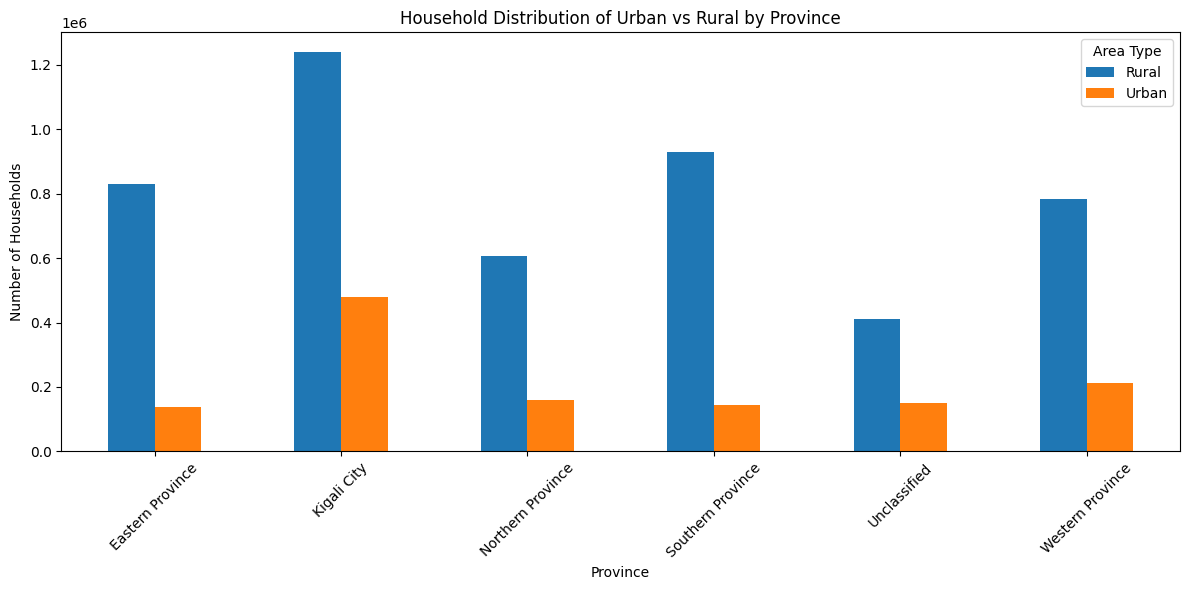

In [13]:
# Graph

import matplotlib.pyplot as plt

plot_df = pdf.pivot(index="province_name", columns="area_type", values="n_households")

# Plot
plot_df.plot(kind="bar", figsize=(12,6))

plt.title("Household Distribution of Urban vs Rural by Province")
plt.xlabel("Province")
plt.ylabel("Number of Households")
plt.xticks(rotation=45)
plt.legend(title="Area Type")
plt.tight_layout()

plt.show()



### **Q2. Average age of household members by province**
- Compute the average age of individuals in each province.

In [14]:
# # Getting numeric agess

df_age = (
    df_spark
    .withColumn("age_raw", F.trim(F.col("P08")))
    .filter(F.col("age_raw").rlike("^[0-9]+$")) 
    .withColumn("age", F.col("age_raw").cast("int"))
)


# # nw numeric age column added for calculations
df_age.printSchema() 

root
 |-- prov_id: integer (nullable = true)
 |-- reg_id: integer (nullable = true)
 |-- dist_id: integer (nullable = true)
 |-- adm4: integer (nullable = true)
 |-- urban_rural: integer (nullable = true)
 |-- hh_id: decimal(26,0) (nullable = true)
 |-- P03: integer (nullable = true)
 |-- P05: integer (nullable = true)
 |-- P07M: integer (nullable = true)
 |-- P07A: integer (nullable = true)
 |-- P08: string (nullable = true)
 |-- lan_spoken_local: string (nullable = true)
 |-- lan_spoken_fr: string (nullable = true)
 |-- lan_spoken_en: string (nullable = true)
 |-- lan_spoken_other: string (nullable = true)
 |-- lan_read_write_local: string (nullable = true)
 |-- lan_read_write_fr: string (nullable = true)
 |-- lan_read_write_en: string (nullable = true)
 |-- lan_read_write_other: string (nullable = true)
 |-- P21: string (nullable = true)
 |-- P22N: string (nullable = true)
 |-- P23: string (nullable = true)
 |-- P25: string (nullable = true)
 |-- P28: string (nullable = true)
 |-- P

In [15]:
# Avg age per province
avg_age_province = (
    df_age
    .groupBy("prov_id")
    .agg(F.avg("age").alias("avg_age"))
)

avg_age_province.show()

+-------+------------------+
|prov_id|           avg_age|
+-------+------------------+
|      1|23.906683571134334|
|      2|21.262702179926112|
|      3|23.092522717228583|
|      4|21.774495733466285|
|      5|20.349793192127727|
|      6| 23.46021033623403|
+-------+------------------+



In [16]:
# Improving output
avg_age_province = (
    avg_age_province
    .withColumn("province_name", prov_map_expr[F.col("prov_id")])
    .orderBy("prov_id")
)

avg_age_province.show(truncate=False)


+-------+------------------+-----------------+
|prov_id|avg_age           |province_name    |
+-------+------------------+-----------------+
|1      |23.906683571134334|Kigali City      |
|2      |21.262702179926112|Southern Province|
|3      |23.092522717228583|Western Province |
|4      |21.774495733466285|Northern Province|
|5      |20.349793192127727|Eastern Province |
|6      |23.46021033623403 |NULL             |
+-------+------------------+-----------------+



### **Q3. Gender distribution per district**
- What is the proportion of males and females in each district (`reg_id`)?

In [17]:
# count males/females per district
gender_counts = (
    df_spark
    .groupBy("reg_id", "P05")
    .agg(F.count("*").alias("count"))
)

gender_counts.show()

+------+---+-------+
|reg_id|P05|  count|
+------+---+-------+
|    11|  1|1777869|
|    11|  2|1846056|
|    12|  2|1038749|
|    12|  1|1040910|
|    14|  2| 330152|
|    13|  2| 445081|
|    14|  1| 340841|
|    13|  1| 453468|
|    21|  2| 730103|
|    21|  1| 714484|
|    22|  2| 424624|
|    22|  1| 412492|
|    23|  2| 736878|
|    23|  1| 703779|
|    24|  1| 207877|
|    24|  2| 209435|
|    25|  1| 502390|
|    25|  2| 528014|
|    31|  2| 753826|
|    31|  1| 724646|
+------+---+-------+
only showing top 20 rows


In [18]:
# Dividing into male/ female cols 

gender_pivot = (
    gender_counts
    .groupBy("reg_id")
    .pivot("P05", [1, 2])    
    .sum("count")
    .withColumnRenamed("1", "male_count")
    .withColumnRenamed("2", "female_count")
)

gender_pivot.show()

+------+----------+------------+
|reg_id|male_count|female_count|
+------+----------+------------+
|    31|    724646|      753826|
|    53|    397304|      411747|
|    44|    153120|      155824|
|    12|   1040910|     1038749|
|    22|    412492|      424624|
|    52|    431588|      468647|
|    13|    453468|      445081|
|    54|    343536|      348927|
|    41|    456039|      473273|
|    43|    196040|      197238|
|    61|    432977|      456985|
|    23|    703779|      736878|
|    51|    881858|      916036|
|    25|    502390|      528014|
|    24|    207877|      209435|
|    62|    554684|      569088|
|    21|    714484|      730103|
|    32|    566503|      583586|
|    11|   1777869|     1846056|
|    33|    622913|      627018|
+------+----------+------------+
only showing top 20 rows


In [19]:
# Proportions
gender_dist = (
    gender_pivot
    .withColumn("total", F.col("male_count") + F.col("female_count"))
    .withColumn("prop_male", F.col("male_count") / F.col("total"))
    .withColumn("prop_female", F.col("female_count") / F.col("total"))
)

gender_dist.show()


+------+----------+------------+-------+-------------------+-------------------+
|reg_id|male_count|female_count|  total|          prop_male|        prop_female|
+------+----------+------------+-------+-------------------+-------------------+
|    31|    724646|      753826|1478472| 0.4901317035425764| 0.5098682964574236|
|    53|    397304|      411747| 809051| 0.4910741102847657| 0.5089258897152342|
|    44|    153120|      155824| 308944| 0.4956238023719509| 0.5043761976280491|
|    12|   1040910|     1038749|2079659|   0.50051955633111|0.49948044366888994|
|    22|    412492|      424624| 837116|0.49275369243927963| 0.5072463075607204|
|    52|    431588|      468647| 900235| 0.4794170411059335| 0.5205829588940666|
|    13|    453468|      445081| 898549| 0.5046669686349882|0.49533303136501183|
|    54|    343536|      348927| 692463| 0.4961073732459352| 0.5038926267540649|
|    41|    456039|      473273| 929312|0.49072754898247306| 0.5092724510175269|
|    43|    196040|      197

In [20]:
# remaking the output

reg_id = {
    11: "Nyarugenge",
    12: "Gasabo",
    13: "Kicukiro",
    14: "Kigali Extra Stratum",

    21: "Nyanza",
    22: "Gisagara",
    23: "Nyaruguru",
    24: "Huye",
    25: "Nyamagabe",

    31: "Karongi",
    32: "Ngororero",
    33: "Rutsiro",

    41: "Musanze",
    42: "Burera",
    43: "Gicumbi",
    44: "Rulindo",

    51: "Rwamagana",
    52: "Kayonza",
    53: "Nyagatare",
    54: "Gatsibo"
}


dist_kv = []
for k, v in reg_id.items():
    dist_kv.append(F.lit(k))
    dist_kv.append(F.lit(v))

dist_map = F.create_map(*dist_kv)


gender_dist = gender_dist.withColumn(
    "district_name",
    dist_map[F.col("reg_id")]
)


gender_dist.orderBy("reg_id").show(truncate=False)


+------+----------+------------+-------+-------------------+-------------------+--------------------+
|reg_id|male_count|female_count|total  |prop_male          |prop_female        |district_name       |
+------+----------+------------+-------+-------------------+-------------------+--------------------+
|11    |1777869   |1846056     |3623925|0.4905921066247232 |0.5094078933752768 |Nyarugenge          |
|12    |1040910   |1038749     |2079659|0.50051955633111   |0.49948044366888994|Gasabo              |
|13    |453468    |445081      |898549 |0.5046669686349882 |0.49533303136501183|Kicukiro            |
|14    |340841    |330152      |670993 |0.5079650607383386 |0.4920349392616615 |Kigali Extra Stratum|
|21    |714484    |730103      |1444587|0.49459395661182054|0.5054060433881794 |Nyanza              |
|22    |412492    |424624      |837116 |0.49275369243927963|0.5072463075607204 |Gisagara            |
|23    |703779    |736878      |1440657|0.48851253282356594|0.5114874671764341 |Ny

## Plot for distribution

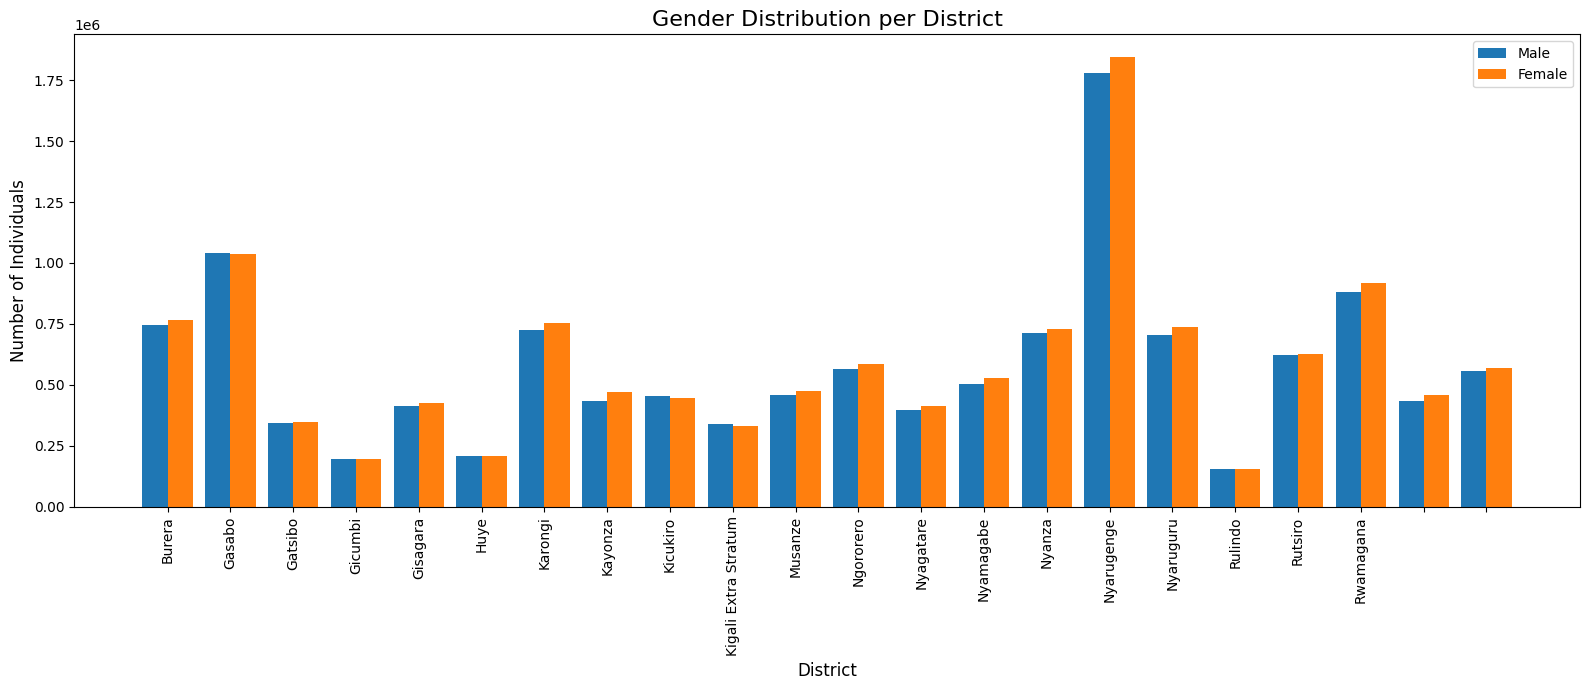

In [21]:
import numpy as np

pdf = gender_dist.toPandas()
pdf = pdf.sort_values("district_name")

x = np.arange(len(pdf))
width = 0.4

plt.figure(figsize=(16, 7))

# Side by side bar plot
plt.bar(x - width/2, pdf["male_count"],  width=width, label="Male")
plt.bar(x + width/2, pdf["female_count"], width=width, label="Female")

plt.title("Gender Distribution per District", fontsize=16)
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.xticks(x, pdf["district_name"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



### **Q4. Literacy rates by language**
- What percentage of people can read/write in local language, French, English, and other languages?

In [22]:
#*
def clean_binary(col):
    return (
        F.when(F.trim(F.col(col)).isin("0", "1"), F.col(col))
         .otherwise("0")   # invalid values become 0 instead of dropping rows
    )

df_lit = (
    df_spark
    .withColumn("rw_local",  clean_binary("lan_read_write_local").cast("int"))
    .withColumn("rw_fr",     clean_binary("lan_read_write_fr").cast("int"))
    .withColumn("rw_en",     clean_binary("lan_read_write_en").cast("int"))
    .withColumn("rw_other",  clean_binary("lan_read_write_other").cast("int"))
)

total = df_lit.count()

lang_stats = (
    df_lit.agg(
        F.sum("rw_local").alias("local_yes"),
        F.sum("rw_fr").alias("french_yes"),
        F.sum("rw_en").alias("english_yes"),
        F.sum("rw_other").alias("other_yes")
    )
    .withColumn("pct_local",   F.round(F.col("local_yes") / total * 100, 1))
    .withColumn("pct_french",  F.round(F.col("french_yes") / total * 100, 1))
    .withColumn("pct_english", F.round(F.col("english_yes") / total * 100, 1))
    .withColumn("pct_other",   F.round(F.col("other_yes") / total * 100, 1))
)

lang_stats.show(truncate=False)


+---------+----------+-----------+---------+---------+----------+-----------+---------+
|local_yes|french_yes|english_yes|other_yes|pct_local|pct_french|pct_english|pct_other|
+---------+----------+-----------+---------+---------+----------+-----------+---------+
|16243838 |7108058   |2467926    |150610   |63.3     |27.7      |9.6        |0.6      |
+---------+----------+-----------+---------+---------+----------+-----------+---------+



### **Q5. Household size analysis**
- Compute the number of members per household (`hh_id`) and the average household size per province.

In [23]:
#Household size per hh_id

hh_sizes = (
    df_spark
    .groupBy("hh_id", "prov_id")
    .agg(F.count("*").alias("household_size"))
)

hh_sizes.show(5, truncate=False)


+--------------------------+-------+--------------+
|hh_id                     |prov_id|household_size|
+--------------------------+-------+--------------+
|11101101010021058021550155|1      |3             |
|11101101020011035020530053|1      |7             |
|11101101020011035021890189|1      |4             |
|11101101020011036020510051|1      |4             |
|11101101020011036020560056|1      |4             |
+--------------------------+-------+--------------+
only showing top 5 rows


In [24]:
#Average household size per province

avg_hh_size_province = (
    hh_sizes
    .groupBy("prov_id")
    .agg(F.round(F.avg("household_size"), 2).alias("avg_household_size"))
    .orderBy("prov_id")
)

avg_hh_size_province.show(truncate=False)


+-------+------------------+
|prov_id|avg_household_size|
+-------+------------------+
|1      |4.24              |
|2      |4.82              |
|3      |3.9               |
|4      |4.11              |
|5      |4.34              |
|6      |3.58              |
+-------+------------------+



In [25]:
# improved output
avg_hh_size_province = (
    avg_hh_size_province
    .withColumn("province_name", prov_map_expr[F.col("prov_id")])
    .orderBy("prov_id")
)
avg_hh_size_province.show(truncate=False)


+-------+------------------+-----------------+
|prov_id|avg_household_size|province_name    |
+-------+------------------+-----------------+
|1      |4.24              |Kigali City      |
|2      |4.82              |Southern Province|
|3      |3.9               |Western Province |
|4      |4.11              |Northern Province|
|5      |4.34              |Eastern Province |
|6      |3.58              |NULL             |
+-------+------------------+-----------------+



In [26]:
# # visuals
# hh_pdf = hh_sizes.toPandas()
# hh_pdf['province_name'] = hh_pdf['prov_id'].map(prov_id)
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))

# sns.boxplot(
#     data=hh_pdf,
#     x='province_name', 
#     y='household_size'
# )

# plt.title("Household Size Distribution by Province")
# plt.xlabel("Province")
# plt.ylabel("Household Size")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



### **Q6. Education level distribution**
- How many people attended each level of education (`P21`) per province?

In [27]:
df_spark.select("P21").distinct().orderBy("P21").show(truncate=False)

+---+
|P21|
+---+
|   |
|0  |
|1  |
|2  |
|9  |
+---+



## If we treat 0 as None; 1 as Primary; 2 as Secondary; 9 as Tertiary: This is based on assumption on decoding the numbers above


In [28]:
df_edu = (
    df_spark
    .withColumn("P21_trim", F.trim(F.col("P21")))
    .withColumn(
        "P21_clean",
        F.when(F.col("P21_trim") == "0", "None")
         .when(F.col("P21_trim") == "1", "Primary")
         .when(F.col("P21_trim") == "2", "Secondary")
         .when(F.col("P21_trim") == "9", "Tertiary")   
         .otherwise("Unknown")                         
    )
)




In [29]:
# count per province and edu level
edu_dist = (
    df_edu
    .groupBy("prov_id", "P21_clean")
    .agg(F.count("*").alias("n_people"))
    .orderBy("prov_id", "P21_clean")
)


edu_dist.show()

+-------+---------+--------+
|prov_id|P21_clean|n_people|
+-------+---------+--------+
|      1|     None|  689510|
|      1|  Primary| 4015943|
|      1|Secondary| 1926393|
|      1| Tertiary|   54427|
|      1|  Unknown|  586853|
|      2|     None| 1327405|
|      2|  Primary| 2021248|
|      2|Secondary| 1318526|
|      2| Tertiary|   45545|
|      2|  Unknown|  457352|
|      3|     None|  603235|
|      3|  Primary| 1903852|
|      3|Secondary| 1015751|
|      3| Tertiary|   36947|
|      3|  Unknown|  318707|
|      4|     None|  836068|
|      4|  Primary| 1244528|
|      4|Secondary|  763968|
|      4| Tertiary|   33285|
|      4|  Unknown|  261276|
+-------+---------+--------+
only showing top 20 rows


In [30]:
# Improved output
edu_dist = edu_dist.withColumn(
    "province_name",
    prov_map_expr[F.col("prov_id")]
).orderBy("prov_id", "P21_clean")

edu_dist.show(truncate=False)


+-------+---------+--------+-----------------+
|prov_id|P21_clean|n_people|province_name    |
+-------+---------+--------+-----------------+
|1      |None     |689510  |Kigali City      |
|1      |Primary  |4015943 |Kigali City      |
|1      |Secondary|1926393 |Kigali City      |
|1      |Tertiary |54427   |Kigali City      |
|1      |Unknown  |586853  |Kigali City      |
|2      |None     |1327405 |Southern Province|
|2      |Primary  |2021248 |Southern Province|
|2      |Secondary|1318526 |Southern Province|
|2      |Tertiary |45545   |Southern Province|
|2      |Unknown  |457352  |Southern Province|
|3      |None     |603235  |Western Province |
|3      |Primary  |1903852 |Western Province |
|3      |Secondary|1015751 |Western Province |
|3      |Tertiary |36947   |Western Province |
|3      |Unknown  |318707  |Western Province |
|4      |None     |836068  |Northern Province|
|4      |Primary  |1244528 |Northern Province|
|4      |Secondary|763968  |Northern Province|
|4      |Tert

In [31]:
window = (
    edu_dist
    .groupBy("prov_id")
    .agg(F.sum("n_people").alias("prov_total"))
)

edu_with_total = (
    edu_dist
    .join(window, on="prov_id")
    .withColumn("pct_in_province", F.round(F.col("n_people") / F.col("prov_total") * 100, 1))
    .orderBy("prov_id", "P21_clean")
)

edu_with_total.show(truncate=False)


+-------+---------+--------+-----------------+----------+---------------+
|prov_id|P21_clean|n_people|province_name    |prov_total|pct_in_province|
+-------+---------+--------+-----------------+----------+---------------+
|1      |None     |689510  |Kigali City      |7273126   |9.5            |
|1      |Primary  |4015943 |Kigali City      |7273126   |55.2           |
|1      |Secondary|1926393 |Kigali City      |7273126   |26.5           |
|1      |Tertiary |54427   |Kigali City      |7273126   |0.7            |
|1      |Unknown  |586853  |Kigali City      |7273126   |8.1            |
|2      |None     |1327405 |Southern Province|5170076   |25.7           |
|2      |Primary  |2021248 |Southern Province|5170076   |39.1           |
|2      |Secondary|1318526 |Southern Province|5170076   |25.5           |
|2      |Tertiary |45545   |Southern Province|5170076   |0.9            |
|2      |Unknown  |457352  |Southern Province|5170076   |8.8            |
|3      |None     |603235  |Western Pr

In [32]:
# Group or track by percentage for easy follow

edu_pivot = (
    edu_with_total
    .groupBy("province_name")
    .pivot("P21_clean", ["None", "Primary", "Secondary", "Tertiary", "Unknown"])
    .agg(F.first("pct_in_province"))
    .orderBy("province_name")
)

edu_pivot.show(truncate=False)


+-----------------+----+-------+---------+--------+-------+
|province_name    |None|Primary|Secondary|Tertiary|Unknown|
+-----------------+----+-------+---------+--------+-------+
|NULL             |14.4|48.2   |28.4     |1.2     |7.8    |
|Eastern Province |49.3|21.7   |19.2     |0.7     |9.2    |
|Kigali City      |9.5 |55.2   |26.5     |0.7     |8.1    |
|Northern Province|26.6|39.6   |24.3     |1.1     |8.3    |
|Southern Province|25.7|39.1   |25.5     |0.9     |8.8    |
|Western Province |15.6|49.1   |26.2     |1.0     |8.2    |
+-----------------+----+-------+---------+--------+-------+



### **Q7. Identify households with multilingual members**
- List households where at least one member speaks more than one language.

In [33]:
# clean language col
df_lang = (
    df_spark
    .withColumn("sp_local",F.when(F.col("lan_spoken_local") == "1", 1).otherwise(0))
    .withColumn("sp_fr",F.when(F.col("lan_spoken_fr") == "1", 1).otherwise(0))
    .withColumn("sp_en",F.when(F.col("lan_spoken_en") == "1", 1).otherwise(0))
    .withColumn("sp_other",F.when(F.col("lan_spoken_other") == "1", 1).otherwise(0))
)



In [34]:
# languages one person speak

df_lang = df_lang.withColumn(
    "n_langs_spoken",
    F.col("sp_local")
    + F.col("sp_fr")
    + F.col("sp_en")
    + F.col("sp_other")
)

df_lang.select("hh_id", "n_langs_spoken").show(truncate=False)


+--------------------------+--------------+
|hh_id                     |n_langs_spoken|
+--------------------------+--------------+
|11101101010011066020020002|2             |
|11101101010011066020020002|2             |
|11101101010011066020020002|4             |
|11101101010011066020020002|2             |
|11101101010011066020240024|2             |
|11101101010011066020240024|2             |
|11101101010011066020240024|2             |
|11101101010011066020240024|0             |
|11101101010011066020240024|1             |
|11101101010011066020300030|1             |
|11101101010011066020300030|1             |
|11101101010011066020300030|2             |
|11101101010011066020300030|2             |
|11101101010011066020300030|2             |
|11101101010011066020300030|1             |
|11101101010011066020300030|1             |
|11101101010011066020300030|1             |
|11101101010011066020420042|2             |
|11101101010011066020420042|2             |
|11101101010011066020480048|2   

In [35]:
# household membr having a multi_lingual
df_lang = df_lang.withColumn(
    "is_multilingual_member",
    F.when(F.col("n_langs_spoken") >= 2, 1).otherwise(0)
)

# boolean for the is_multilingual_member
df_lang.select("hh_id","sp_local", "sp_fr", "sp_en", "sp_other","n_langs_spoken", "is_multilingual_member").show(10, False)


+--------------------------+--------+-----+-----+--------+--------------+----------------------+
|hh_id                     |sp_local|sp_fr|sp_en|sp_other|n_langs_spoken|is_multilingual_member|
+--------------------------+--------+-----+-----+--------+--------------+----------------------+
|11101101010011066020020002|1       |1    |0    |0       |2             |1                     |
|11101101010011066020020002|1       |1    |0    |0       |2             |1                     |
|11101101010011066020020002|1       |1    |1    |1       |4             |1                     |
|11101101010011066020020002|1       |1    |0    |0       |2             |1                     |
|11101101010011066020240024|1       |1    |0    |0       |2             |1                     |
|11101101010011066020240024|1       |1    |0    |0       |2             |1                     |
|11101101010011066020240024|1       |1    |0    |0       |2             |1                     |
|11101101010011066020240024|0 

In [36]:
# based on household if has a least one multilingual
hh_multilingual = (
    df_lang
    .groupBy("hh_id")
    .agg(F.max("is_multilingual_member").alias("has_multilingual_member"))
    .filter(F.col("has_multilingual_member") == 1)
)

hh_multilingual.show(truncate=False)


+--------------------------+-----------------------+
|hh_id                     |has_multilingual_member|
+--------------------------+-----------------------+
|11101101010011066020760076|1                      |
|11101101010021060020690069|1                      |
|11101101010031065020820082|1                      |
|11101101020011036020300030|1                      |
|11101101020011036021030103|1                      |
|11101101020011087022540254|1                      |
|11101101020021088023740374|1                      |
|11101101020021089020190019|1                      |
|11101101020031086022240224|1                      |
|11101101020031086022260226|1                      |
|11101101020031087023090309|1                      |
|11101101020041006021080108|1                      |
|11101101020041006022080208|1                      |
|11101101020041006022940294|1                      |
|11101101020041034020860086|1                      |
|11101101030011030020970097|1                 

In [37]:
# count
hh_multilingual.count()


2246889

In [38]:
# total household
total_hh = df_spark.select("hh_id").distinct().count()
total_hh


6079876

In [39]:
# Percentage
multilingual_hh = hh_multilingual.count()
pct_hh = multilingual_hh / total_hh * 100
pct_hh


36.95616489546826

### **Q8. Age vs. education correlation**
- Explore the correlation between age (`P08`) and highest level of education (`P21`).

### **Q9. Most common occupations per province**
- Find the top 5 occupations (`P29`) in each province.


In [ ]:
from pyspark.sql.window import Window

# Count people per province & occupation
occ_counts = (
    df_spark
    .groupBy("prov_id", "P29")          
    .agg(F.count("*").alias("n_people"))
)

#  rank occupations by count
w = Window.partitionBy("prov_id").orderBy(F.col("n_people").desc())

occ_ranked = (
    occ_counts
    .withColumn("rank_in_province", F.row_number().over(w))
)

# Keeping only top 5 per province
top5_occ = (
    occ_ranked
    .filter(F.col("rank_in_province") <= 5)
)

# Add province name  
top5_occ = (
    top5_occ
    .withColumn("province_name", prov_map_expr[F.col("prov_id")])
    .orderBy("prov_id", "rank_in_province")
)

top5_occ.show(100, truncate=False)   # enough to see all top-5s


+-------+---+--------+----------------+-----------------+
|prov_id|P29|n_people|rank_in_province|province_name    |
+-------+---+--------+----------------+-----------------+
|1      |   |4130140 |1               |Kigali City      |
|1      |20 |473557  |2               |Kigali City      |
|1      |18 |387230  |3               |Kigali City      |
|1      |19 |266870  |4               |Kigali City      |
|1      |22 |229332  |5               |Kigali City      |
|2      |   |3225326 |1               |Southern Province|
|2      |20 |354815  |2               |Southern Province|
|2      |18 |310706  |3               |Southern Province|
|2      |19 |162165  |4               |Southern Province|
|2      |17 |145433  |5               |Southern Province|
|3      |   |2237258 |1               |Western Province |
|3      |20 |283368  |2               |Western Province |
|3      |18 |244022  |3               |Western Province |
|3      |19 |148992  |4               |Western Province |
|3      |17 |1

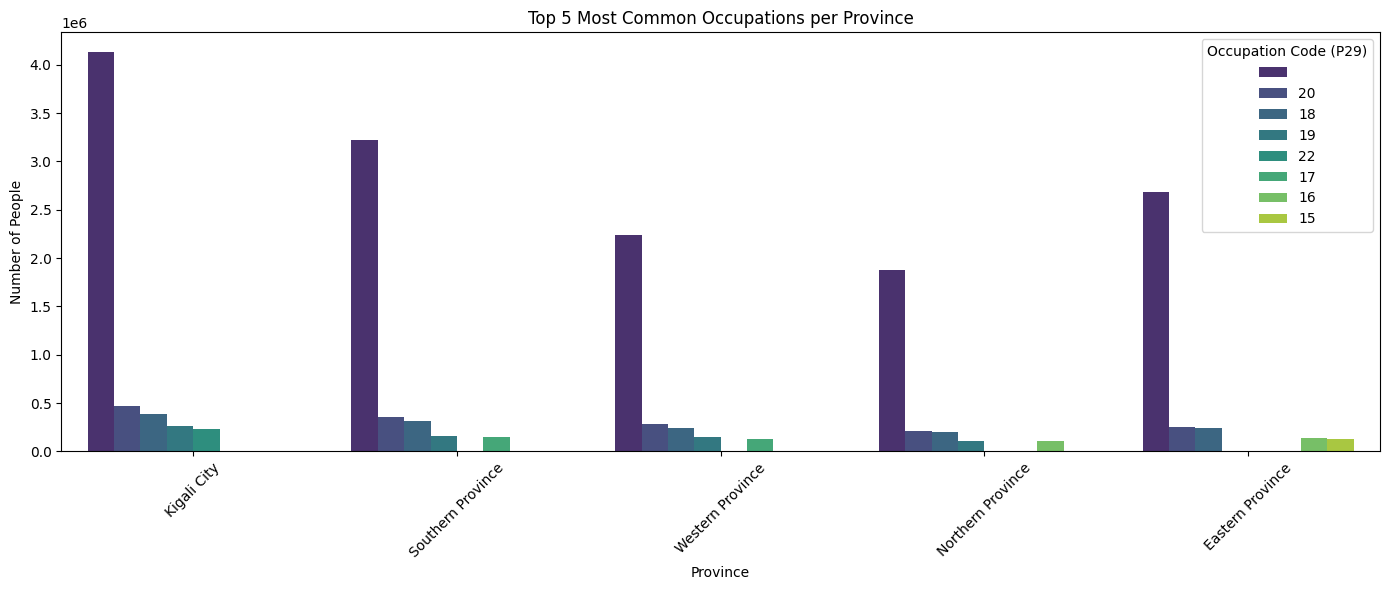

In [ ]:
# Plot
import seaborn as sns
pdf = top5_occ.toPandas()

pdf["P29_label"] = pdf["P29"].astype(str)
plt.figure(figsize=(14, 6))

sns.barplot(
    data=pdf,
    x="province_name",
    y="n_people",
    hue="P29_label",
    palette="viridis"
)

plt.title("Top 5 Most Common Occupations per Province")
plt.xlabel("Province")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend(title="Occupation Code (P29)")
plt.tight_layout()
plt.show()


### **10. Data quality check**
- Identify columns with missing or null values.


In [ ]:
missing_cols = df_spark.select([
    F.sum(
        (
        F.col(c).isNull() |
        (F.col(c).cast("string") == "") |
        (F.trim(F.col(c).cast("string")) == "")
        ).cast("int")
    ).alias(c)
    for c in df_spark.columns
])

missing_cols.show(truncate=False)


+-------+------+-------+----+-----------+-----+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+-------+-------+-------+--------+-------+--------+----------+
|prov_id|reg_id|dist_id|adm4|urban_rural|hh_id|P03|P05|P07M|P07A|P08|lan_spoken_local|lan_spoken_fr|lan_spoken_en|lan_spoken_other|lan_read_write_local|lan_read_write_fr|lan_read_write_en|lan_read_write_other|P21    |P22N   |P23    |P25     |P28    |P29     |change_log|
+-------+------+-------+----+-----------+-----+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+-------+-------+-------+--------+-------+--------+----------+
|0      |0     |0      |0   |0          |0    |0  |0  |0   |0   |881|2165987         |2166013      |2166021      |2166030         |2165457             |2165466          |2165471          


- Compute the percentage of missing values per column.

In [53]:
total_rows = df_spark.count()

missing_pct = missing_cols.select([
    (F.col(c) / total_rows * 100).alias(c + "_pct")
    for c in missing_cols.columns
])

missing_pct.show(truncate=False)


+-----------+----------+-----------+--------+---------------+---------+-------+-------+--------+--------+--------------------+--------------------+-----------------+-----------------+--------------------+------------------------+---------------------+---------------------+------------------------+-----------------+------------------+-----------------+----------------+------------------+------------------+--------------+
|prov_id_pct|reg_id_pct|dist_id_pct|adm4_pct|urban_rural_pct|hh_id_pct|P03_pct|P05_pct|P07M_pct|P07A_pct|P08_pct             |lan_spoken_local_pct|lan_spoken_fr_pct|lan_spoken_en_pct|lan_spoken_other_pct|lan_read_write_local_pct|lan_read_write_fr_pct|lan_read_write_en_pct|lan_read_write_other_pct|P21_pct          |P22N_pct          |P23_pct          |P25_pct         |P28_pct           |P29_pct           |change_log_pct|
+-----------+----------+-----------+--------+---------------+---------+-------+-------+--------+--------+--------------------+--------------------+-----

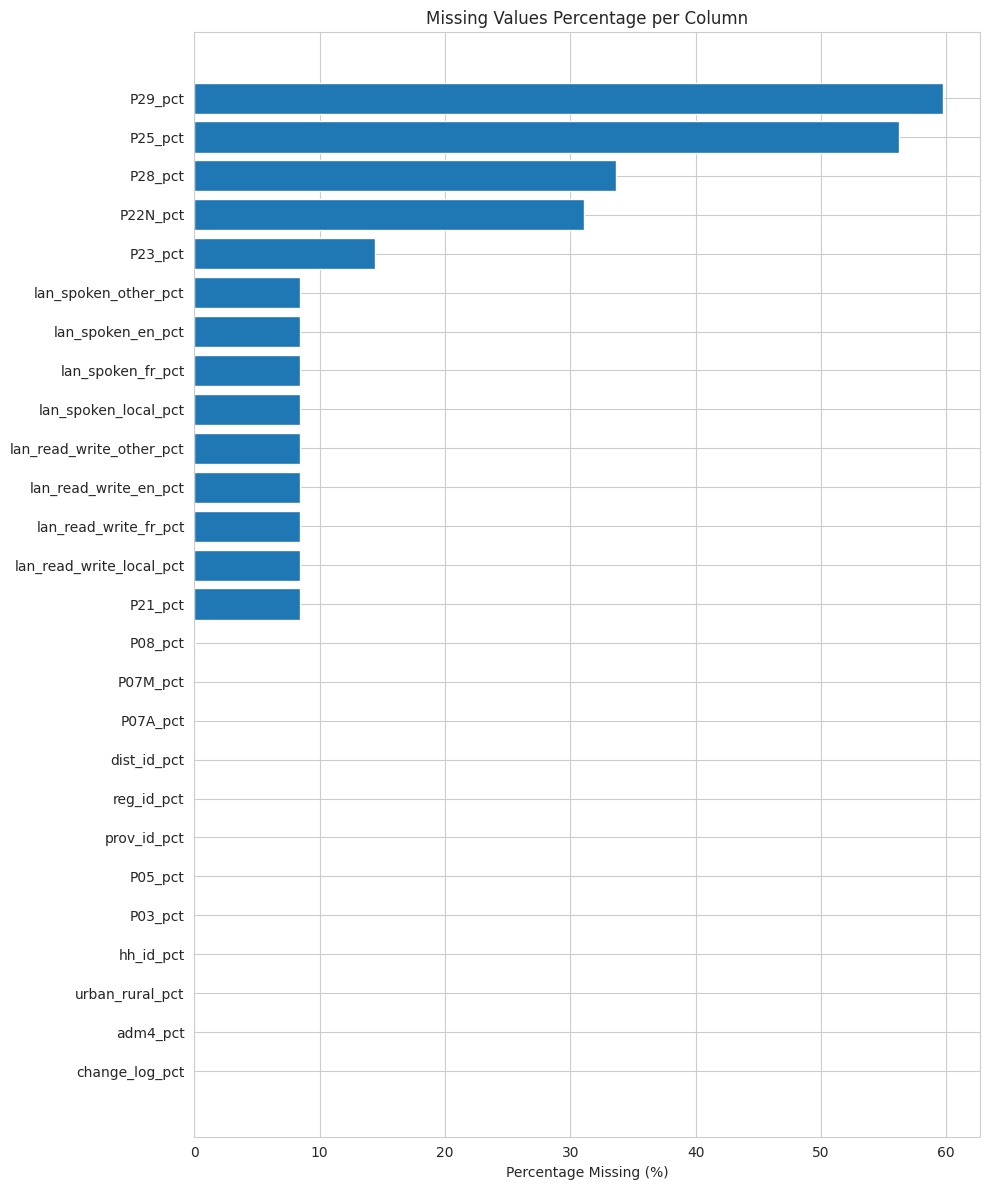

In [56]:
pdf_pct = missing_pct.toPandas().T
pdf_pct.columns = ["missing_pct"]

# Sort descendingly
pdf_pct = pdf_pct.sort_values("missing_pct", ascending=False)

plt.figure(figsize=(10, 12))
plt.barh(pdf_pct.index, pdf_pct["missing_pct"])
plt.xlabel("Percentage Missing (%)")
plt.title("Missing Values Percentage per Column")
plt.gca().invert_yaxis()   
plt.tight_layout()
plt.show()


In [1]:
spark.stop()

NameError: name 'spark' is not defined

# **Part 2: Machine Learning**
## Music Genre classification

Have you ever wondered what makes us, humans, able to tell apart two songs of different genres? How we do we inherenly know the difference between a pop song and heavy metal? This type of classifcation may seem easy for us, but it's a very difficult challenge for a computer to do. So the question is, could an automatic genre classifcation model be possible?

We will be classifying songs based on a number of characteristics into a set of 23 electronic genres. This technology could be used by an application like Pandora to recommend songs to users or just create meaningful channels. Super fun!

### Dataset
*beatsdataset.csv*
Each row is an electronic music song. The dataset contains 100 song for each genre among 23 electronic music genres, they were the top (100) songs of their genres on November 2016. The 71 columns are audio features extracted of a two random minutes sample of the file audio. These features have been extracted using pyAudioAnalysis (https://github.com/tyiannak/pyAudioAnalysis).

### Your task
Use a classification algorithm that classifies songs into the 23 genres provided. Test out several different models and select the highest performing one. Also play around with feature selection methods and finally try to make a recommendation to a user.  

For the feature selection aspect of this project, you may need to get a bit creative if you want to select features from a non-tree algorithm. I did not go over this aspect of PySpark intentionally in the previous lectures to give you chance to get used to researching the PySpark documentation page. Here is the link to the Feature Selectors section of the documentation that just might come in handy: https://spark.apache.org/docs/latest/ml-features.html#feature-selectors


### Source
https://www.kaggle.com/caparrini/beatsdataset

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Music Genre Assignment") \
    .getOrCreate()


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/23 15:31:13 WARN Utils: Your hostname, aimsit, resolves to a loopback address: 127.0.1.1; using 10.6.252.98 instead (on interface wlp0s20f3)
25/11/23 15:31:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/23 15:31:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/23 15:31:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [5]:
spark

## Load/inspect data

In [10]:
df = spark.read.csv("Assignment2/Datasets/beatsdataset.csv",header=True,inferSchema=True)
df = df.drop("_c0")

In [13]:
df.printSchema()


root
 |-- 1-ZCRm: double (nullable = true)
 |-- 2-Energym: double (nullable = true)
 |-- 3-EnergyEntropym: double (nullable = true)
 |-- 4-SpectralCentroidm: double (nullable = true)
 |-- 5-SpectralSpreadm: double (nullable = true)
 |-- 6-SpectralEntropym: double (nullable = true)
 |-- 7-SpectralFluxm: double (nullable = true)
 |-- 8-SpectralRolloffm: double (nullable = true)
 |-- 9-MFCCs1m: double (nullable = true)
 |-- 10-MFCCs2m: double (nullable = true)
 |-- 11-MFCCs3m: double (nullable = true)
 |-- 12-MFCCs4m: double (nullable = true)
 |-- 13-MFCCs5m: double (nullable = true)
 |-- 14-MFCCs6m: double (nullable = true)
 |-- 15-MFCCs7m: double (nullable = true)
 |-- 16-MFCCs8m: double (nullable = true)
 |-- 17-MFCCs9m: double (nullable = true)
 |-- 18-MFCCs10m: double (nullable = true)
 |-- 19-MFCCs11m: double (nullable = true)
 |-- 20-MFCCs12m: double (nullable = true)
 |-- 21-MFCCs13m: double (nullable = true)
 |-- 22-ChromaVector1m: double (nullable = true)
 |-- 23-ChromaVector2m:

In [ ]:
df.show(5)


+---------------+---------------+----------------+-------------------+-----------------+------------------+----------------+------------------+--------------+-------------+---------------+----------------+---------------+---------------+----------------+---------------+----------------+----------------+-----------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+---------------+---------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+-------------------+----------

In [14]:
row_count = df.count()
col_count = len(df.columns)

print("Rows:", row_count)
print("Columns:", col_count)


Rows: 2300
Columns: 72


In [15]:
df = df.drop("Unnamed: 0")


## Missing val check

In [16]:
from pyspark.sql.functions import col, sum

missing = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing.show()


+------+---------+----------------+-------------------+-----------------+------------------+---------------+------------------+---------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+---------+------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----

# Some EDA ...

## Wants to see the Genre distrubution

In [ ]:
# songs per genre
from pyspark.sql.functions import col

genre_counts = df.groupBy("class").count().orderBy(col("count").desc())
genre_counts.show(30, truncate=False)


+--------------------+-----+
|class               |count|
+--------------------+-----+
|PsyTrance           |100  |
|HardDance           |100  |
|Breaks              |100  |
|HardcoreHardTechno  |100  |
|IndieDanceNuDisco   |100  |
|Trance              |100  |
|DeepHouse           |100  |
|ElectronicaDowntempo|100  |
|ReggaeDub           |100  |
|Minimal             |100  |
|DrumAndBass         |100  |
|Dubstep             |100  |
|BigRoom             |100  |
|Techno              |100  |
|House               |100  |
|FutureHouse         |100  |
|ElectroHouse        |100  |
|GlitchHop           |100  |
|TechHouse           |100  |
|HipHop              |100  |
|FunkRAndB           |100  |
|Dance               |100  |
|ProgressiveHouse    |100  |
+--------------------+-----+



## Plot

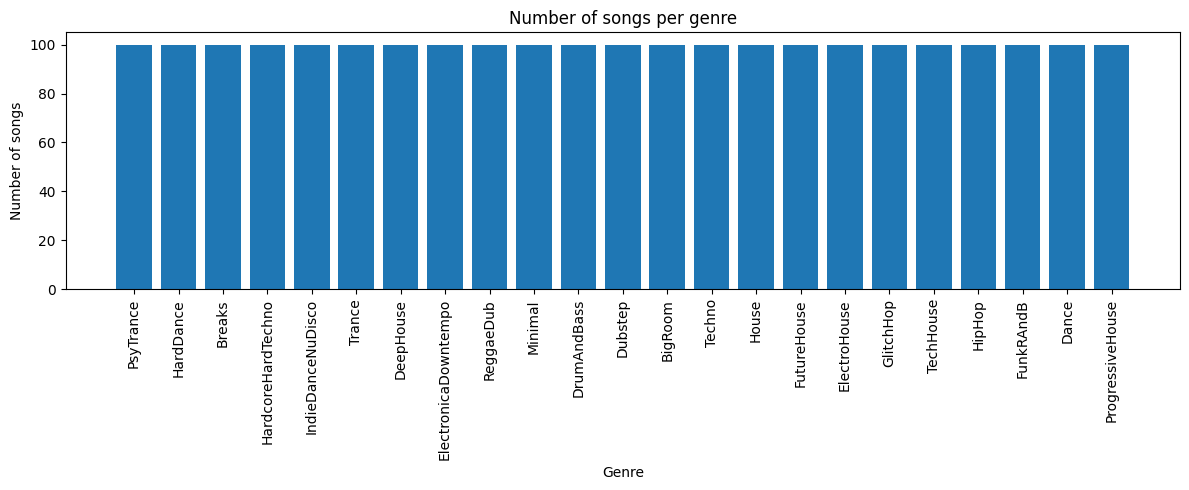

In [18]:
import matplotlib.pyplot as plt

genre_pd = genre_counts.toPandas()

plt.figure(figsize=(12, 5))
plt.bar(genre_pd["class"], genre_pd["count"])
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Number of songs")
plt.title("Number of songs per genre")
plt.tight_layout()
plt.show()


## Info of features

In [19]:
numeric_cols = [c for c in df.columns if c != "class"]

summary = df.select(numeric_cols).describe()
summary.show(truncate=False)


+-------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+-------------------+---------------------+--------------------+--------------------+--------------------+---------------------+--------------------+------------------+--------------------+-------------------+----------------------+--------------------+---------------------+---------------------+---------------------+------------------+------------------+-------------------+--------------------+--------------------+--------------------

In [ ]:
# summary.toPandas()


## checking out some of them features

In [20]:
features_to_plot = [
    "1-ZCRm",
    "2-Energym",
    "4-SpectralCentroidm",
    "9-MFCCs1m",
    "69-BPM"
]

sample_pd = df.select(features_to_plot).sample(fraction=0.3, seed=42).toPandas()


## Plots for the Features i was testing out

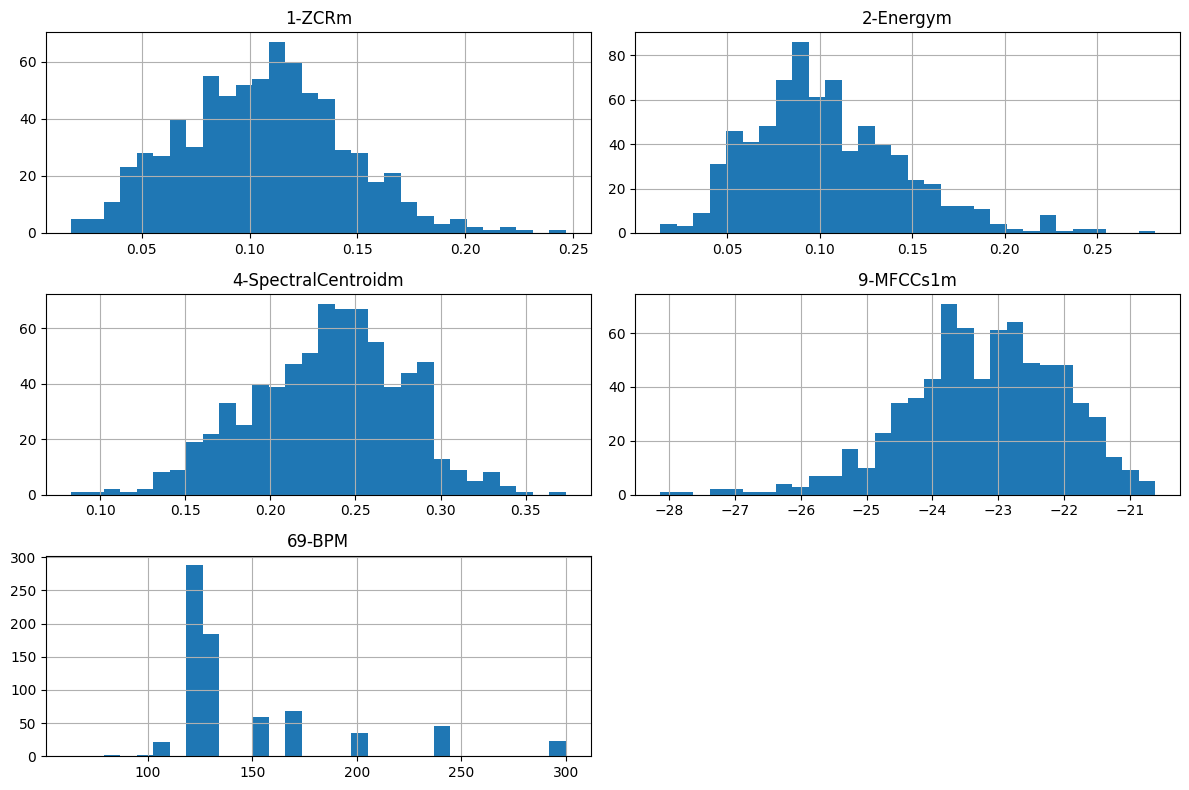

In [21]:
import matplotlib.pyplot as plt

sample_pd.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


## Correlation Matrix

In [22]:
corr_features = [
    "1-ZCRm",
    "2-Energym",
    "4-SpectralCentroidm",
    "5-SpectralSpreadm",
    "9-MFCCs1m",
    "10-MFCCs2m",
    "69-BPM"
]

corr_pd = df.select(corr_features).sample(fraction=0.3, seed=42).toPandas()
corr_matrix = corr_pd.corr()
corr_matrix


,1-ZCRm,2-Energym,4-SpectralCentroidm,5-SpectralSpreadm,9-MFCCs1m,10-MFCCs2m,69-BPM
1-ZCRm,1.000000,0.065131,0.913176,0.604117,0.417370,-0.782633,0.160998
2-Energym,0.065131,1.000000,0.241443,0.318406,0.566647,-0.264206,0.108414
4-SpectralCentroidm,0.913176,0.241443,1.000000,0.846112,0.438125,-0.749502,0.166234
5-SpectralSpreadm,0.604117,0.318406,0.846112,1.000000,0.345495,-0.430897,0.052627
9-MFCCs1m,0.417370,0.566647,0.438125,0.345495,1.000000,-0.531704,0.114655
10-MFCCs2m,-0.782633,-0.264206,-0.749502,-0.430897,-0.531704,1.000000,-0.235854
69-BPM,0.160998,0.108414,0.166234,0.052627,0.114655,-0.235854,1.000000


## Heatmap

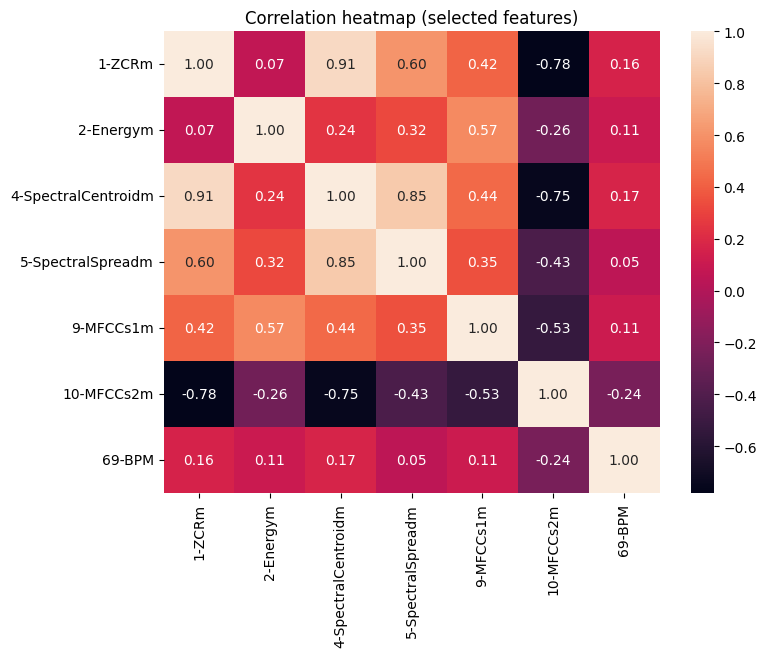

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation heatmap (selected features)")
plt.show()


## Looking in to the some feature ranges if ii can finding some insights

In [24]:
df.select("2-Energym").summary().show()

df.select("69-BPM").summary().show()


+-------+-------------------+
|summary|          2-Energym|
+-------+-------------------+
|  count|               2300|
|   mean|0.10425174466333932|
| stddev|0.04096553918825427|
|    min|   0.00494799624461|
|    25%|    0.0758447245345|
|    50%|     0.099937173433|
|    75%|     0.128057067238|
|    max|     0.281533479209|
+-------+-------------------+

+-------+------------------+
|summary|            69-BPM|
+-------+------------------+
|  count|              2300|
|   mean|148.22553723922272|
| stddev|  46.6411599307751|
|    min|     63.1578947368|
|    25%|             120.0|
|    50%|     133.333333333|
|    75%|             150.0|
|    max|             600.0|
+-------+------------------+



## Doing some Mel-Frequency Cepstral Coeffients checks

In [26]:
from pyspark.sql.functions import avg

mfcc_by_genre = (
    df.groupBy("class")
      .agg(avg("9-MFCCs1m").alias("MFCC1_mean"))
      .orderBy("MFCC1_mean")
)

mfcc_by_genre.show(truncate=False)


+--------------------+-------------------+
|class               |MFCC1_mean         |
+--------------------+-------------------+
|Minimal             |-24.774088432212   |
|ElectronicaDowntempo|-24.214516724922017|
|DeepHouse           |-24.16006357185201 |
|TechHouse           |-23.967836532853   |
|IndieDanceNuDisco   |-23.850467287426   |
|ProgressiveHouse    |-23.613945662493   |
|ReggaeDub           |-23.576066366040003|
|FunkRAndB           |-23.56808631384699 |
|Techno              |-23.552153910057015|
|HardcoreHardTechno  |-23.542222876964004|
|House               |-23.274098951048   |
|Breaks              |-23.26896472333    |
|GlitchHop           |-23.046338181216004|
|PsyTrance           |-23.031569760441002|
|Dance               |-22.801558640459003|
|HipHop              |-22.741958381011003|
|DrumAndBass         |-22.65443423713899 |
|Dubstep             |-22.611915661088002|
|FutureHouse         |-22.39573257464599 |
|Trance              |-22.219304762166008|
+----------

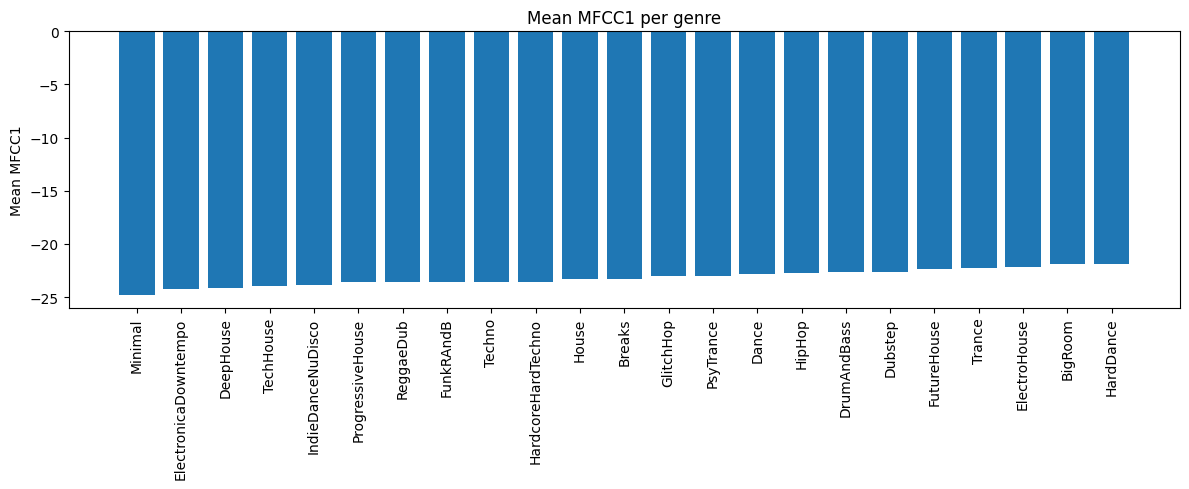

In [27]:
mfcc_pd = mfcc_by_genre.toPandas()

plt.figure(figsize=(12, 5))
plt.bar(mfcc_pd["class"], mfcc_pd["MFCC1_mean"])
plt.xticks(rotation=90)
plt.ylabel("Mean MFCC1")
plt.title("Mean MFCC1 per genre")
plt.tight_layout()
plt.show()


In [ ]:
sample_pd = df.select(numeric_cols)\
              .sample(fraction=0.4, seed=42)\
              .toPandas()

skewness = sample_pd.skew().sort_values(ascending=False)
kurtosis = sample_pd.kurt().sort_values(ascending=False)

print("Top 10 Most Skewed Features:")
print(skewness.head(10))

print("\nTop 10 Highest Kurtosis (Outlier-prone Features):")
print(kurtosis.head(10))


Top 10 Most Skewed Features:
23-ChromaVector2m       5.337150
57-ChromaVector2std     3.517185
33-ChromaVector12m      3.072219
60-ChromaVector5std     2.740900
22-ChromaVector1m       2.494015
67-ChromaVector12std    2.469752
31-ChromaVector10m      2.327435
26-ChromaVector5m       2.250466
41-SpectralFluxstd      2.248415
63-ChromaVector8std     2.230163
dtype: float64

Top 10 Highest Kurtosis (Outlier-prone Features):
23-ChromaVector2m       57.681097
57-ChromaVector2std     21.496452
33-ChromaVector12m      18.955967
60-ChromaVector5std     15.131886
67-ChromaVector12std    13.671489
41-SpectralFluxstd      12.417466
22-ChromaVector1m       11.435535
63-ChromaVector8std      9.988280
32-ChromaVector11m       9.942037
31-ChromaVector10m       9.358878
dtype: float64


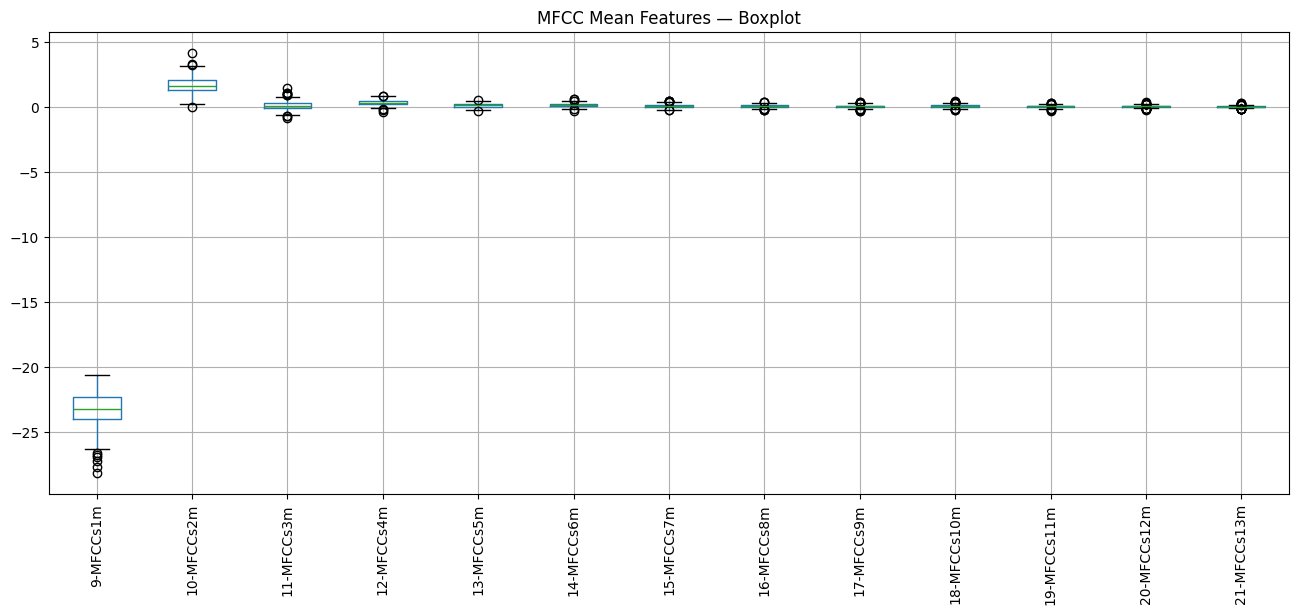

In [ ]:
mfcc_cols = [c for c in df.columns if "MFCCs" in c and c.endswith("m")]  # only means, not std

mfcc_pd = df.select(mfcc_cols)\
            .sample(fraction=0.2, seed=42)\
            .toPandas()


plt.figure(figsize=(16, 6))
mfcc_pd.boxplot()
plt.xticks(rotation=90)
plt.title("MFCC Mean Features — Boxplot")
plt.show()


## Bpm analysis by genre

In [30]:
from pyspark.sql.functions import avg, min, max

bpm_stats = (
    df.groupBy("class")
      .agg(
          avg("69-BPM").alias("mean_BPM"),
          min("69-BPM").alias("min_BPM"),
          max("69-BPM").alias("max_BPM")
      )
      .orderBy("mean_BPM")
)

bpm_stats.show(truncate=False)


+--------------------+------------------+-------------+-------------+
|class               |mean_BPM          |min_BPM      |max_BPM      |
+--------------------+------------------+-------------+-------------+
|House               |122.92857142857001|120.0        |240.0        |
|DeepHouse           |126.34285714287   |120.0        |240.0        |
|Minimal             |126.39999999991991|120.0        |240.0        |
|TechHouse           |126.49523809522998|120.0        |240.0        |
|ProgressiveHouse    |128.89523809522998|120.0        |240.0        |
|Techno              |130.55238095230993|120.0        |240.0        |
|HardcoreHardTechno  |132.51428571398978|120.0        |171.428571429|
|FutureHouse         |133.18095238084993|120.0        |240.0        |
|Dance               |135.49593739592402|92.3076923077|300.0        |
|BigRoom             |137.21428571399977|120.0        |240.0        |
|IndieDanceNuDisco   |138.84848484847998|109.090909091|600.0        |
|FunkRAndB          

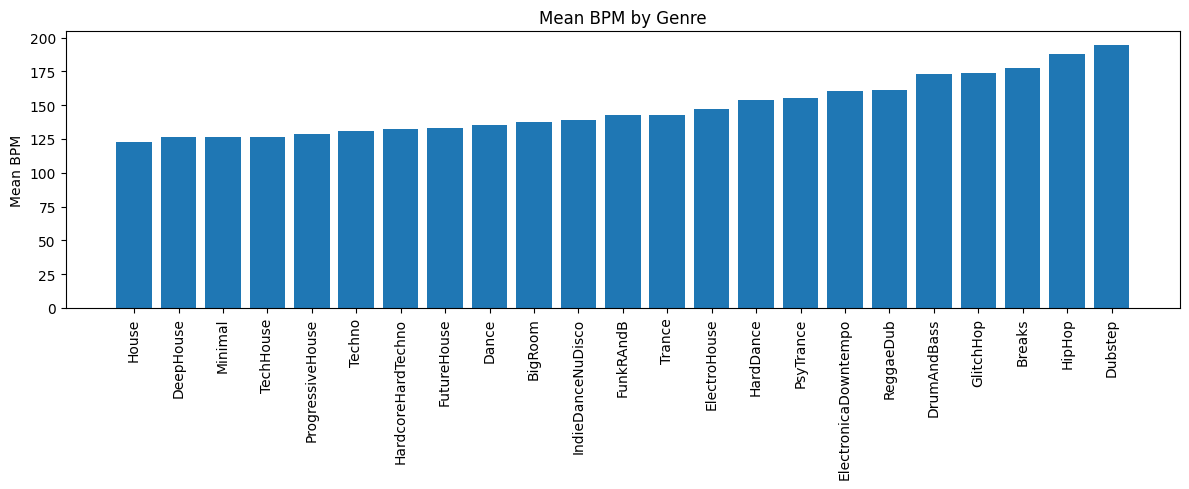

In [31]:
bpm_pd = bpm_stats.toPandas()

plt.figure(figsize=(12, 5))
plt.bar(bpm_pd["class"], bpm_pd["mean_BPM"])
plt.xticks(rotation=90)
plt.ylabel("Mean BPM")
plt.title("Mean BPM by Genre")
plt.tight_layout()
plt.show()


## spectral Feature Heatmap

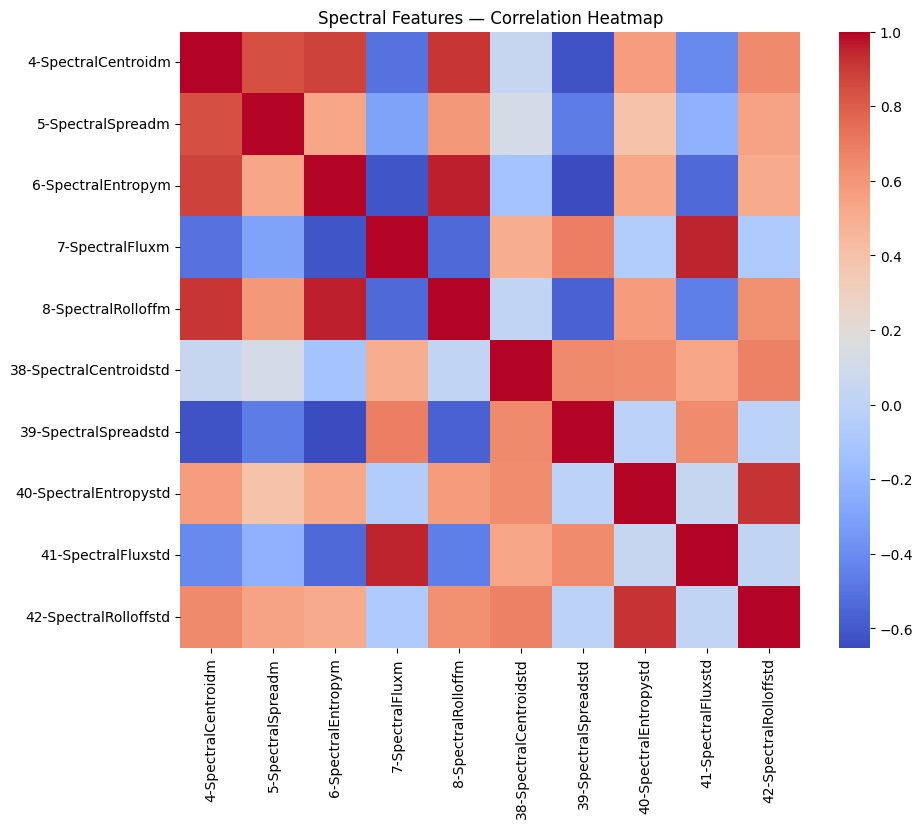

In [32]:
spectral_cols = [c for c in df.columns if "Spectral" in c]

spectral_pd = df.select(spectral_cols).sample(fraction=0.2, seed=42).toPandas()
spectral_corr = spectral_pd.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(spectral_corr, cmap="coolwarm")
plt.title("Spectral Features — Correlation Heatmap")
plt.show()


# Feature variance

In [33]:
from pyspark.sql.functions import variance

vars_df = df.select(*[variance(c).alias(c) for c in numeric_cols])
vars_df.show(truncate=False)


+---------------------+--------------------+--------------------+---------------------+--------------------+-------------------+---------------------+--------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+---------------------+--------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+--------------------+----------------------+--------------------+---------------------+-------------------+---------------------+-------------------+-------------------+--------------------+---------------------+--------------------+--

## This time i want to see the useless features

In [34]:
vars_pd = vars_df.toPandas().T
vars_pd.columns = ["variance"]
vars_pd.sort_values("variance").head(10)


,variance
29-ChromaVector8m,0.000002
63-ChromaVector8std,0.000003
33-ChromaVector12m,0.000005
30-ChromaVector9m,0.000006
67-ChromaVector12std,0.000006
64-ChromaVector9std,0.000007
23-ChromaVector2m,0.000007
57-ChromaVector2std,0.000009
27-ChromaVector6m,0.000017
61-ChromaVector6std,0.000017


# I want to try out the z-score outlier detection method to just see extremes. I might use a different method later 

In [37]:
z = np.abs((sample_pd - sample_pd.mean()) / sample_pd.std())
outlier_counts = (z > 3).sum().sort_values(ascending=False)

outlier_counts.head(10)


69-BPM                  26
27-ChromaVector6m       23
59-ChromaVector4std     21
65-ChromaVector10std    21
56-ChromaVector1std     20
25-ChromaVector4m       19
26-ChromaVector5m       17
61-ChromaVector6std     17
64-ChromaVector9std     17
32-ChromaVector11m      16
dtype: int64

## This is showing some number of songs having unsualness that we have to check out


# Data Processing

### Label encode target

In [41]:
from pyspark.ml.feature import StringIndexer

label_indexer = StringIndexer(
    inputCol="class",
    outputCol="label"
)

df_indexed = label_indexer.fit(df).transform(df)

df_indexed.select("class", "label").show(10)


+-------+-----+
|  class|label|
+-------+-----+
|BigRoom|  0.0|
|BigRoom|  0.0|
|BigRoom|  0.0|
|BigRoom|  0.0|
|BigRoom|  0.0|
|BigRoom|  0.0|
|BigRoom|  0.0|
|BigRoom|  0.0|
|BigRoom|  0.0|
|BigRoom|  0.0|
+-------+-----+
only showing top 10 rows


# The map from number to genre

In [43]:
label_mapping = (
    df_indexed
    .select("class", "label")
    .distinct()
    .orderBy("label")
)

label_mapping.show(30, truncate=False)


+--------------------+-----+
|class               |label|
+--------------------+-----+
|BigRoom             |0.0  |
|Breaks              |1.0  |
|Dance               |2.0  |
|DeepHouse           |3.0  |
|DrumAndBass         |4.0  |
|Dubstep             |5.0  |
|ElectroHouse        |6.0  |
|ElectronicaDowntempo|7.0  |
|FunkRAndB           |8.0  |
|FutureHouse         |9.0  |
|GlitchHop           |10.0 |
|HardDance           |11.0 |
|HardcoreHardTechno  |12.0 |
|HipHop              |13.0 |
|House               |14.0 |
|IndieDanceNuDisco   |15.0 |
|Minimal             |16.0 |
|ProgressiveHouse    |17.0 |
|PsyTrance           |18.0 |
|ReggaeDub           |19.0 |
|TechHouse           |20.0 |
|Techno              |21.0 |
|Trance              |22.0 |
+--------------------+-----+



## Building and assembler vector

In [44]:
feature_cols = [c for c in df_indexed.columns if c not in ["class", "label"]]
len(feature_cols), feature_cols[:10]  


(71,
 ['1-ZCRm',
  '2-Energym',
  '3-EnergyEntropym',
  '4-SpectralCentroidm',
  '5-SpectralSpreadm',
  '6-SpectralEntropym',
  '7-SpectralFluxm',
  '8-SpectralRolloffm',
  '9-MFCCs1m',
  '10-MFCCs2m'])

In [45]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features"
)

df_features = assembler.transform(df_indexed)

df_features.select("features", "label").show(5, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## standardizing features

In [46]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(
    inputCol="features",
    outputCol="scaledFeatures",
    withMean=True,   # center
    withStd=True     # scale by std
)

scaler_model = scaler.fit(df_features)
df_scaled = scaler_model.transform(df_features)

df_scaled.select("features", "scaledFeatures", "label").show(5, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Train, Test part

In [47]:
train_df, test_df = df_scaled.randomSplit([0.8, 0.2], seed=42)

print("Training rows:", train_df.count())
print("Test rows:", test_df.count())


Training rows: 1897
Test rows: 403


## For Feature selection i will use chisqselector for first 30

In [53]:
from pyspark.ml.feature import ChiSqSelector

selector = ChiSqSelector(
    numTopFeatures=30, 
    featuresCol="scaledFeatures",
    outputCol="chi_features",
    labelCol="label"
)

chi_model = selector.fit(df_scaled)
df_chi = chi_model.transform(df_scaled)

df_chi.select("chi_features", "label").show(5, truncate=False)


+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|chi_features                                                                                                                                                                                                                                                                                                                                                                                      

## Preparing Data for modeling

In [54]:
df_final = df_chi.select("chi_features", "label") \
                 .withColumnRenamed("chi_features", "features")

# Train / test 
train_df, test_df = df_final.randomSplit([0.8, 0.2], seed=42)

print("Training rows:", train_df.count())
print("Test rows:", test_df.count())


Training rows: 1897
Test rows: 403


## An evaluator

In [55]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)


## some models to try

## Logistic regression

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(
    featuresCol="features",
    labelCol="label",
    maxIter=50,
    regParam=0.01
)

lr_model = lr.fit(train_df)
lr_preds = lr_model.transform(test_df)
lr_acc = evaluator.evaluate(lr_preds)
print("Logistic Regression accuracy:", lr_acc)


Logistic Regression accuracy: 0.37965260545905705


## Seems low, trying cross validation logistic reg

In [59]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(
    featuresCol="features",
    labelCol="label",
    maxIter=100
)

paramGrid = (ParamGridBuilder()
    .addGrid(lr.regParam, [0.001, 0.01, 0.1, 1.0])
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # 0=L2, 1=L1
    .build())

evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)

cv = CrossValidator(
    estimator=lr,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3,
    parallelism=2
)

cv_model = cv.fit(train_df)
lr_best = cv_model.bestModel

lr_cv_preds = lr_best.transform(test_df)
lr_cv_acc = evaluator.evaluate(lr_cv_preds)
print("Tuned Logistic Regression accuracy:", lr_cv_acc)
print("Best regParam:", lr_best._java_obj.getRegParam())
print("Best elasticNetParam:", lr_best._java_obj.getElasticNetParam())


25/11/23 16:46:07 WARN BlockManager: Block rdd_690_0 already exists on this machine; not re-adding it
25/11/23 16:46:28 WARN BlockManager: Block rdd_1805_0 already exists on this machine; not re-adding it


Tuned Logistic Regression accuracy: 0.40198511166253104
Best regParam: 0.001
Best elasticNetParam: 1.0


In [ ]:
# using df_scaled instead of df_chi
df_full = df_scaled.select("scaledFeatures", "label").withColumnRenamed("scaledFeatures", "features")

train_full, test_full = df_full.randomSplit([0.8, 0.2], seed=42)

lr_full = LogisticRegression(featuresCol="features",labelCol="label",
    maxIter=100,
    regParam=0.01
)

lr_full_model = lr_full.fit(train_full)
lr_full_preds = lr_full_model.transform(test_full)
lr_full_acc = evaluator.evaluate(lr_full_preds)
print("LogReg accuracy with ALL features:", lr_full_acc)


LogReg accuracy with ALL features: 0.44168734491315137


## Random forest

In [66]:
# scaledFeatures  for Random Forest
df_rf = df_scaled.select("scaledFeatures", "label") \
                 .withColumnRenamed("scaledFeatures", "features")

train_rf, test_rf = df_rf.randomSplit([0.8, 0.2], seed=42)

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    numTrees=100,
    maxDepth=10,
    seed=42
)

rf_model = rf.fit(train_rf)
rf_preds = rf_model.transform(test_rf)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)

rf_acc = evaluator.evaluate(rf_preds)
print("Random Forest accuracy:", rf_acc)


25/11/23 16:57:48 WARN DAGScheduler: Broadcasting large task binary with size 1369.8 KiB
25/11/23 16:57:49 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB
25/11/23 16:57:50 WARN DAGScheduler: Broadcasting large task binary with size 4.4 MiB
25/11/23 16:57:50 WARN DAGScheduler: Broadcasting large task binary with size 1032.4 KiB
25/11/23 16:57:51 WARN DAGScheduler: Broadcasting large task binary with size 6.8 MiB
25/11/23 16:57:51 WARN DAGScheduler: Broadcasting large task binary with size 1299.0 KiB
25/11/23 16:57:53 WARN DAGScheduler: Broadcasting large task binary with size 8.7 MiB
25/11/23 16:57:53 WARN DAGScheduler: Broadcasting large task binary with size 1299.0 KiB
25/11/23 16:57:54 WARN DAGScheduler: Broadcasting large task binary with size 11.3 MiB
25/11/23 16:57:54 WARN DAGScheduler: Broadcasting large task binary with size 1299.2 KiB
25/11/23 16:57:56 WARN DAGScheduler: Broadcasting large task binary with size 3.8 MiB
25/11/23 16:57:56 WARN DAGScheduler: B

Random Forest accuracy: 0.47890818858560796


25/11/23 16:57:58 WARN DAGScheduler: Broadcasting large task binary with size 13.8 MiB


## Trying if cross validation can make it better

In [67]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

rf = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    seed=42
)

paramGrid = (ParamGridBuilder()
    .addGrid(rf.numTrees, [100, 200])
    .addGrid(rf.maxDepth, [8, 12, 16])
    .build())

cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3,
    parallelism=2
)

cv_model = cv.fit(train_rf)
rf_best = cv_model.bestModel

rf_cv_preds = rf_best.transform(test_rf)
rf_cv_acc = evaluator.evaluate(rf_cv_preds)

print("Tuned RF accuracy:", rf_cv_acc)
print("Best numTrees:", rf_best.getNumTrees)
print("Best maxDepth:", rf_best.getOrDefault("maxDepth"))


25/11/23 17:00:27 WARN DAGScheduler: Broadcasting large task binary with size 1367.9 KiB
25/11/23 17:00:27 WARN DAGScheduler: Broadcasting large task binary with size 1367.9 KiB
25/11/23 17:00:28 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
25/11/23 17:00:28 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
25/11/23 17:00:29 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
25/11/23 17:00:29 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
25/11/23 17:00:30 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB
25/11/23 17:00:30 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB
25/11/23 17:00:30 WARN DAGScheduler: Broadcasting large task binary with size 1103.2 KiB
25/11/23 17:00:31 WARN DAGScheduler: Broadcasting large task binary with size 1103.2 KiB
25/11/23 17:00:32 WARN DAGScheduler: Broadcasting large task binary with size 9.7 MiB
25/11/23 17:00:32 WARN DAGScheduler: Broad

Tuned RF accuracy: 0.4838709677419355
Best numTrees: 200
Best maxDepth: 16


## Multilayer Perceptron

In [73]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
  
layers = [30, 256, 128, 64, 23]
 

mlp = MultilayerPerceptronClassifier(
    featuresCol="features",
    labelCol="label",
    maxIter=100,
    layers=layers,
    blockSize=128,
    seed=42
)

mlp_model = mlp.fit(train_df)
mlp_preds = mlp_model.transform(test_df)
mlp_acc = evaluator.evaluate(mlp_preds)
print("MLP accuracy:", mlp_acc)


MLP accuracy: 0.42431761786600497


## Since random forest is my best i wil re-Train on the full dataset

In [ ]:
df_rf_full = df_scaled.select("scaledFeatures", "label") \
                      .withColumnRenamed("scaledFeatures", "features")

# Train/test 
train_rf, test_rf = df_rf_full.randomSplit([0.8, 0.2], seed=42)


In [75]:
rf_final = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    numTrees=200,    
    maxDepth=16,     
    seed=42
)

rf_final_model = rf_final.fit(train_rf)
rf_final_preds = rf_final_model.transform(test_rf)


25/11/23 17:19:32 WARN DAGScheduler: Broadcasting large task binary with size 1320.6 KiB
25/11/23 17:19:33 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB
25/11/23 17:19:34 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/11/23 17:19:35 WARN DAGScheduler: Broadcasting large task binary with size 1298.7 KiB
25/11/23 17:19:36 WARN DAGScheduler: Broadcasting large task binary with size 5.5 MiB
25/11/23 17:19:36 WARN DAGScheduler: Broadcasting large task binary with size 1299.2 KiB
25/11/23 17:19:38 WARN DAGScheduler: Broadcasting large task binary with size 6.8 MiB
25/11/23 17:19:38 WARN DAGScheduler: Broadcasting large task binary with size 1298.7 KiB
25/11/23 17:19:39 WARN DAGScheduler: Broadcasting large task binary with size 8.6 MiB
25/11/23 17:19:40 WARN DAGScheduler: Broadcasting large task binary with size 1299.0 KiB
25/11/23 17:19:41 WARN DAGScheduler: Broadcasting large task binary with size 11.4 MiB
25/11/23 17:19:42 WARN DAGScheduler: B

## Evaluate

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)

rf_final_acc = evaluator.evaluate(rf_final_preds)
print("Final RF accuracy:", rf_final_acc)


25/11/23 17:21:08 WARN DAGScheduler: Broadcasting large task binary with size 52.2 MiB


Final Random Forest accuracy: 0.4838709677419355


In [77]:
rf_final_preds.groupBy("label", "prediction").count().orderBy("label").show(200)


25/11/23 17:21:39 WARN DAGScheduler: Broadcasting large task binary with size 52.2 MiB
25/11/23 17:21:41 WARN DAGScheduler: Broadcasting large task binary with size 52.1 MiB


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  0.0|      22.0|    2|
|  0.0|       6.0|    2|
|  0.0|       7.0|    1|
|  0.0|       0.0|   15|
|  1.0|      12.0|    1|
|  1.0|       1.0|   10|
|  1.0|      18.0|    1|
|  1.0|       6.0|    3|
|  1.0|      10.0|    1|
|  1.0|       0.0|    1|
|  1.0|       4.0|    1|
|  1.0|       5.0|    1|
|  2.0|       0.0|    2|
|  2.0|      19.0|    1|
|  2.0|       2.0|    4|
|  2.0|       9.0|    3|
|  2.0|      14.0|    1|
|  2.0|      11.0|    1|
|  2.0|      21.0|    1|
|  2.0|      10.0|    3|
|  3.0|      15.0|    3|
|  3.0|      14.0|    1|
|  3.0|       7.0|    2|
|  3.0|       8.0|    3|
|  3.0|       3.0|    6|
|  3.0|      20.0|    2|
|  3.0|      17.0|    4|
|  4.0|      22.0|    1|
|  4.0|       4.0|   10|
|  4.0|      11.0|    1|
|  4.0|       1.0|    1|
|  5.0|       8.0|    1|
|  5.0|       4.0|    2|
|  5.0|      13.0|    1|
|  5.0|      11.0|    2|
|  5.0|       5.0|   12|
|  6.0|       1.0|    2|


## this above is showing some misclassifications

In [78]:
rf_final_preds.select("features", "label", "prediction").show(10, truncate=False)


25/11/23 17:24:53 WARN DAGScheduler: Broadcasting large task binary with size 52.2 MiB


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## A confusion matrix for that

In [79]:
cm = rf_final_preds.groupBy("label") \
    .pivot("prediction") \
    .count() \
    .na.fill(0) \
    .orderBy("label")

cm.show(200, truncate=False)


25/11/23 17:28:22 WARN DAGScheduler: Broadcasting large task binary with size 52.2 MiB
25/11/23 17:28:23 WARN DAGScheduler: Broadcasting large task binary with size 52.1 MiB
25/11/23 17:28:24 WARN DAGScheduler: Broadcasting large task binary with size 52.1 MiB
25/11/23 17:28:25 WARN DAGScheduler: Broadcasting large task binary with size 52.1 MiB
25/11/23 17:28:26 WARN DAGScheduler: Broadcasting large task binary with size 52.2 MiB
25/11/23 17:28:27 WARN DAGScheduler: Broadcasting large task binary with size 52.1 MiB
25/11/23 17:28:28 WARN DAGScheduler: Broadcasting large task binary with size 52.2 MiB


+-----+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+
|label|0.0|1.0|2.0|3.0|4.0|5.0|6.0|7.0|8.0|9.0|10.0|11.0|12.0|13.0|14.0|15.0|16.0|17.0|18.0|19.0|20.0|21.0|22.0|
+-----+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+
|0.0  |15 |0  |0  |0  |0  |0  |2  |1  |0  |0  |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |2   |
|1.0  |1  |10 |0  |0  |1  |1  |3  |0  |0  |0  |1   |0   |1   |0   |0   |0   |0   |0   |1   |0   |0   |0   |0   |
|2.0  |2  |0  |4  |0  |0  |0  |0  |0  |0  |3  |3   |1   |0   |0   |1   |0   |0   |0   |0   |1   |0   |1   |0   |
|3.0  |0  |0  |0  |6  |0  |0  |0  |2  |3  |0  |0   |0   |0   |0   |1   |3   |0   |4   |0   |0   |2   |0   |0   |
|4.0  |0  |1  |0  |0  |10 |0  |0  |0  |0  |0  |0   |1   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |1   |
|5.0  |0  |0  |0  |0  |2  |12 |0  |0  |1  |0  |0   |2   |0   |1   |0   |0   |0   |0   |0   |0   

## Accuracies
- Logistic Regression = 0.4417
- Multilayer Perceptron = 0.4243
- Random Forest (Tuned) = 0.4839

### Ending up where i had these low accuracies i believe with more datasets and  more tuning it will be better